# UV-Vis Analysis Tool
This Notebook showcases how to use the automation tool.

### UVVisProcessor
Finds files in the 'DATA_FOLDER/' directory and sorts/reads each .txt file that ends in a number. The files must contain two tab-separated columns containing the wavelength and absorbance, respectively, and the header in the second row. It then cleans the spectra, filters between MIN_WAVELENGTH and MAX_WAVELENGTH, and returns an array of all spectra in the folder. It omits spectra with average absorbance values above 2.5, as this typically indicates a uv-vis spectrum that is saturated.

### UVVisAnalyser
Fits peaks to spectra using scipy.signal.find_peaks function. Takes in PEAK_HEIGHT and PEAK_WIDTH to filter peaks. Also provides absorbances of all spectra at wavelength ABS_WAVELENGTH

### UVVisVisualiser
Plots spectra with optional fitted peak values (SHOW_PEAKS). Number of spectra with peaks show is controlled with NUM_SPECTRA.



In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import scipy

from uv_analysis import UVVisProcessor, UVVisAnalyser, UVVisVisualiser

Found files: ['PolymerB_0.txt', 'PolymerB_1.txt', 'PolymerB_2.txt', 'PolymerB_3.txt', 'PolymerB_4.txt', 'PolymerB_5.txt']
spectrum_0 values are too high, omitting
[449]


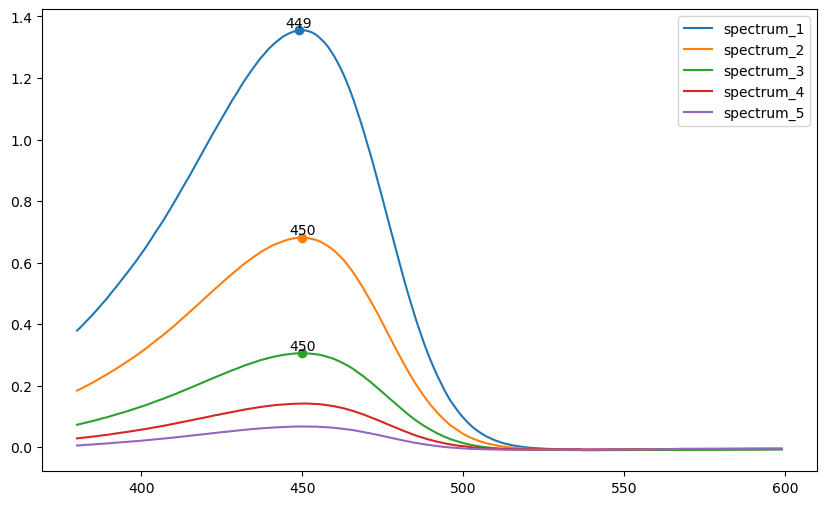

[1.35518, 0.681006, 0.305421, 0.141966, 0.06751]


In [13]:
def main():
    
    DATA_FOLDER = 'PolymerB' # Folder containing UV-Vis data files

    MIN_WAVELENGTH = 380 # nm
    MAX_WAVELENGTH = 600 # nm

    PEAK_HEIGHT = 0.02 # Minimum peak height for detection
    PEAK_WIDTH = 10 # Minimum peak width for detection

    SHOW_PEAKS = True # Plot peak values on spectra
    NUM_SPECTRA = 3 # Number of spectra to plot peaks for

    ABS_WAVELENGTH = 449 # Wavelength to get absorbance at

    processor = UVVisProcessor(min_wl=MIN_WAVELENGTH,max_wl=MAX_WAVELENGTH) # Initialize processor with wavelength range
    spectra = processor.batch_import(DATA_FOLDER) # Import all spectra in folder
    spectra.head()

    analyser = UVVisAnalyser(height=PEAK_HEIGHT,width=PEAK_WIDTH) # Initialize analyser with peak detection parameters

    peaks, absorbances = analyser.fit_peaks(spectra.iloc[:,0]) # Fit peaks for first spectrum
    print(peaks) # Print detected peak wavelengths
    visualiser = UVVisVisualiser() # Initialize visualiser
    visualiser.plot_spectra(spectra,show_peaks=SHOW_PEAKS,peak_analyser=analyser, num_spectra=NUM_SPECTRA) # Plot spectra with peaks

    print(analyser.get_absorbance(spectra,ABS_WAVELENGTH)) # Print absorbance at specified wavelength

main()